# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks 
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

In [1]:
%pip install numpy pandas matplotlib scikit-learn seaborn jupyter ipython

     --------------------------------------- 11.4/11.4 MB 31.2 MB/s eta 0:00:00
     ---------------------------------------- 11.2/11.2 MB 2.9 MB/s eta 0:00:00
     ------------------------------------- 294.9/294.9 KB 17.8 MB/s eta 0:00:00
     ------------------------------------- 509.2/509.2 KB 31.2 MB/s eta 0:00:00
     ---------------------------------------- 46.2/46.2 MB 8.2 MB/s eta 0:00:00
     ------------------------------------- 309.1/309.1 KB 19.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\R0chel\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Load the necessary libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [4]:
%pip install tensorflow

     -------------------------------------- 331.7/331.7 MB 3.6 MB/s eta 0:00:00
     ------------------------------------ 135.8/135.8 KB 896.9 kB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 KB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 7.1 MB/s eta 0:00:00
     -------------------------------------- 437.0/437.0 KB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 60.4/60.4 KB ? eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 6.7 MB/s eta 0:00:00
     -------------------------------------- 210.7/210.7 KB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 2.9/2.9 MB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 KB ? eta 0:00:00
     ---------------------------------------- 72.5/72.5 KB 3.9

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\R0chel\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [6]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [7]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
320,4,129,60,12,231,27.5,0.527,31,0
27,1,97,66,15,140,23.2,0.487,22,0
490,2,83,65,28,66,36.8,0.629,24,0
387,8,105,100,36,0,43.3,0.239,45,1
344,8,95,72,0,0,36.8,0.485,57,0


In [8]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [9]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [11]:
np.mean(y), np.mean(1-y)

(np.float64(0.3489583333333333), np.float64(0.6510416666666666))

Build a single hidden layer neural network using 12 nodes. 
Use the sequential model with single layer network and input shape to 8. 



Normalize the data

In [12]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation 
* Final layer with one node and sigmoid activation (standard for binary classification)

In [13]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

c:\Users\R0chel\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


View the model summary 

In [14]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model 
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history. 


In [ ]:
from keras.optimizers import SGD

model.compile(
    optimizer=SGD(learning_rate=0.003),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

run_hist_1 = model.fit(
    X_train_norm, y_train,
    validation_data=(X_test_norm, y_test),
    epochs=200
)

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4046 - loss: 0.8474 - val_accuracy: 0.3958 - val_loss: 0.7711
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4308 - loss: 0.7886 - val_accuracy: 0.4115 - val_loss: 0.7571
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4037 - loss: 0.8421 - val_accuracy: 0.4427 - val_loss: 0.7442
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4179 - loss: 0.7951 - val_accuracy: 0.4531 - val_loss: 0.7321
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4759 - loss: 0.7834 - val_accuracy: 0.4948 - val_loss: 0.7208
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5084 - loss: 0.7368 - val_accuracy: 0.5260 - val_loss: 0.7103
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5202 - loss: 0.7580 - val_accuracy: 0.5417 - val_loss: 0.7005
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5054 - loss: 0.7698 - val_accuracy: 0.5677 - 

In [19]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.


y_pred_prob_nn_1 = model.predict(X_test_norm)        
y_pred_class_nn_1 = np.argmax(y_pred_prob_nn_1, axis=1)  

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [20]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
y_pred_prob_nn_1[:10]

array([[0.4265197 ],
       [0.49907205],
       [0.2651505 ],
       [0.27483597],
       [0.13774616],
       [0.554713  ],
       [0.06409564],
       [0.28884718],
       [0.8681548 ],
       [0.25008908]], dtype=float32)

Create the plot_roc function

In [22]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.641
roc-auc is 0.813


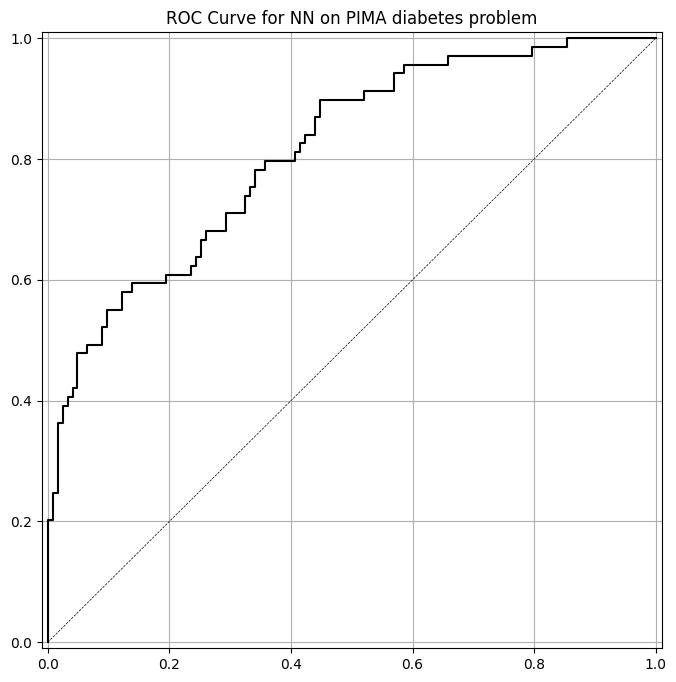

In [23]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [24]:
run_hist_1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

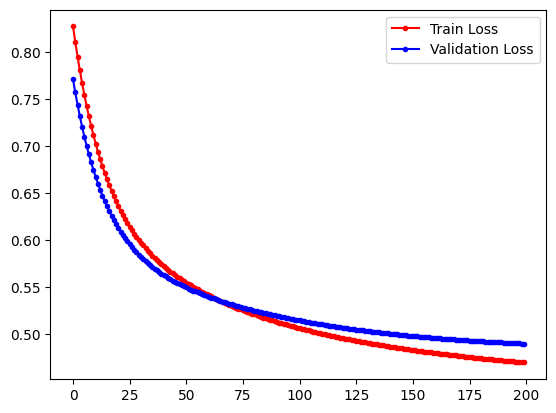

In [25]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

It shows good result because train and validation are low and close to eachother.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures. 
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

### Build a model with two hidden layers, each with 6 nodes

### Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer


In [ ]:
model = Sequential([
    Dense(6, activation="relu", input_shape=(X_train_norm.shape[1],)),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

c:\Users\R0chel\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Use a learning rate of .003 and train for 1500 epochs


In [27]:
model.compile(
    optimizer=SGD(learning_rate=0.003),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

run_hist = model.fit(
    X_train_norm, y_train,
    validation_data=(X_test_norm, y_test),
    epochs=1500,
    verbose=0
)

### Graph the trajectory of the loss functions, accuracy on both train and test set


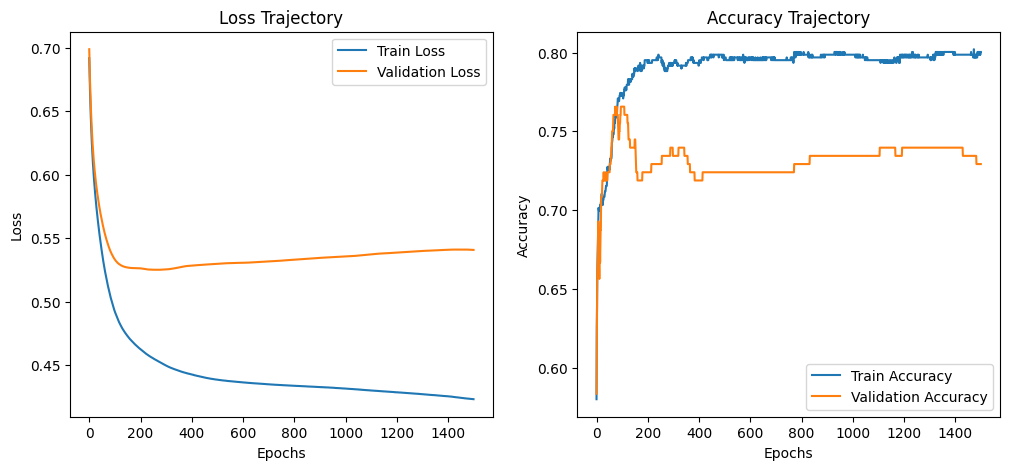

In [28]:
import matplotlib.pyplot as plt

# Plot training vs validation loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(run_hist.history['loss'], label='Train Loss')
plt.plot(run_hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Trajectory')

# Plot training vs validation accuracy
plt.subplot(1,2,2)
plt.plot(run_hist.history['accuracy'], label='Train Accuracy')
plt.plot(run_hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Trajectory')

plt.show()

This shows overfitting.

### Plot the roc curve for the predictions


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


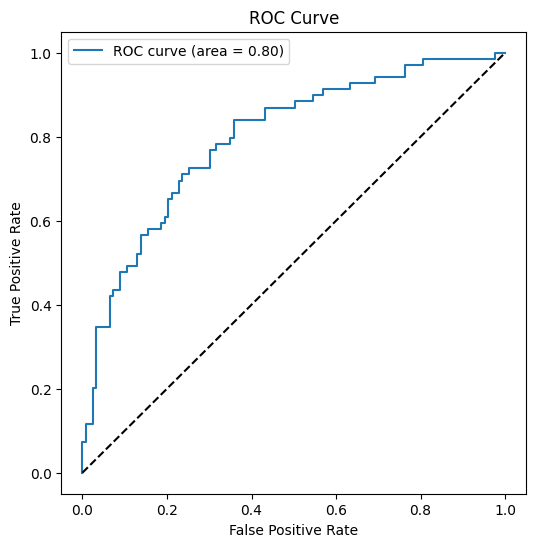

In [29]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_pred_prob = model.predict(X_test_norm)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Use different learning rates, numbers of epochs, and network structures. 


In [60]:
model1 = Sequential([
    Dense(32, activation="tanh", input_shape=(X_train_norm.shape[1],)),  
    Dense(28, activation="tanh"),
    Dense(16, activation="tanh"),
    Dense(1, activation="sigmoid")  
])

model1.compile(
    optimizer=SGD(learning_rate=0.0055),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

run_hist1 = model1.fit(
    X_train_norm, y_train,
    validation_data=(X_test_norm, y_test),
    epochs=300,
    verbose=0
)

### Plot the results of training and validation loss using different learning rates, number of epocgs and network structures


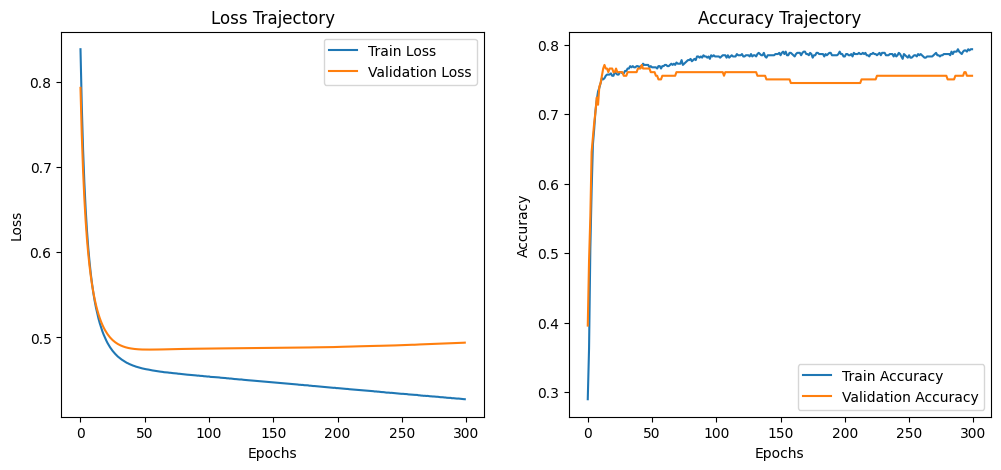

In [61]:
import matplotlib.pyplot as plt

# Plot training vs validation loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(run_hist1.history['loss'], label='Train Loss')
plt.plot(run_hist1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Trajectory')

# Plot training vs validation accuracy
plt.subplot(1,2,2)
plt.plot(run_hist1.history['accuracy'], label='Train Accuracy')
plt.plot(run_hist1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Trajectory')

plt.show()

### Interpret your result

Based on the visualization above, the training loss steadily decreases while the validation loss begins to rise after a certain point, indicating overfitting beyond 300 epochs. The accuracy shows that I reached 78% on the validation set, while training accuracy barely reached 80%; before tuning, it even hit 100%, which confirmed overfitting. I applied hyperparameter tuning to adjust the learning rate, number of epochs, and network structure to improve generalization and reduce the gap between training and validation performance.

#### Conclusion

Through this activity, I was able to apply the Keras library to design and train a neural network model. I gained a clearer understanding of how the input layer feeds data into hidden layers, which then transform the information before producing the final output. I also learned how to assess model performance by plotting training and validation loss with Matplotlib, allowing me to visualize how the network improves across epochs and identify signs of overfitting